In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_decision_regions

## 의사결정트리
* 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석기법
* 기회비용에 대한 고려, 기대 이익 계산, 위험 관리등 효율적인 결정이 필요한 많은 분야에 사용되고 있음
* 의사결정트리는 회귀,분류에 사용되지만 주로 분류에 많이 이용되고 있음
* from sklearn.tree import DecisionTreeClassifier

### iris 데이터셋을 이용한 분석

In [96]:
from sklearn.datasets import load_iris

iris = load_iris()

In [97]:
X_train, X_test, Y_train,Y_test = train_test_split(iris.data,iris.target, train_size=0.7, stratify=iris.target, random_state=2211181110)

In [98]:
dtclf = DecisionTreeClassifier(criterion='entropy')  # 기본값은 gini
dtclf.fit(X_train,Y_train)

dtclf.score(X_train,Y_train)

1.0

In [91]:
pred = dtclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9555555555555556

## 의사결정나무 시각화
* 출력하려면 graphviz라는 라이브러리 필요!
     + graphviz.org => stable 2.38 windows => graphviz-2.38.zip
         + c:/Java 아래에 압축 해제 
         + 폴더명은 graphviz-2.38
         + bin 폴더를 PATH 환경변수로 등록
     + 리눅스는 yum install -y graphviz
     + 맥은 brew install graphviz
* 파이썬 pydotplus 패키지도 필요함     

In [7]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pydotplus
from sklearn import tree

In [16]:
# feature_names : 의사결정 나무 시각화시 특성 이름 지정
# class_names : 의사결정 나무 시각화시 분류결과 이름 지정 
dot_data = tree.export_graphviz(dtclf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('img/iris.png')

True

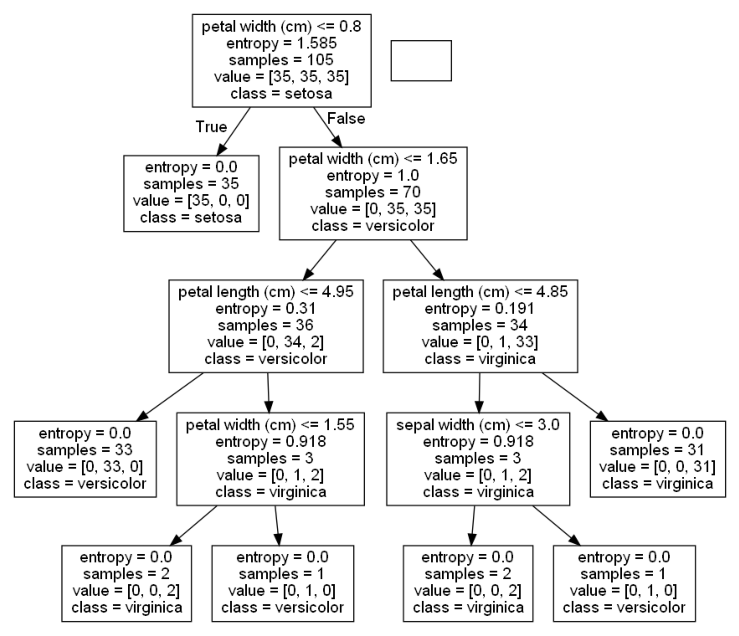

In [17]:
import matplotlib.image as pltimg

img = pltimg.imread('img/iris.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 변수별 중요도 확인

In [99]:
dtclf.feature_importances_

array([0.04364603, 0.01975084, 0.62205337, 0.31454976])

### 타이타닉 승객 생존여부 분석

In [27]:
titanic = pd.read_csv('data/titanic2.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   age       1306 non-null   float64
 2   sibsp     1306 non-null   int64  
 3   parch     1306 non-null   int64  
 4   fare      1306 non-null   float64
 5   gender    1306 non-null   int64  
 6   Embarked  1306 non-null   int64  
 7   Title     1306 non-null   int64  
 8   survived  1306 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 92.0 KB


In [100]:
data = titanic.iloc[:, :8]
target = titanic.survived

In [101]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211181105)

In [105]:
# max_depth : 나무의 최대 가지수 지정
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=5)  # 기본값은 gini
dtclf.fit(X_train,Y_train)

dtclf.score(X_train,Y_train)

0.849015317286652

In [106]:
pred = dtclf.predict(X_test)
accuracy_score(Y_test,pred)

0.7959183673469388

In [107]:
precision_score(Y_test,pred), recall_score(Y_test,pred)

(0.7674418604651163, 0.6644295302013423)

In [108]:
# feature_names : 의사결정 나무 시각화시 특성 이름 지정
# class_names : 의사결정 나무 시각화시 분류결과 이름 지정 
dot_data = tree.export_graphviz(dtclf, out_file=None,
                               feature_names=data.columns,
                               class_names=titanic.columns[8])
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('img/titanic.png')

True

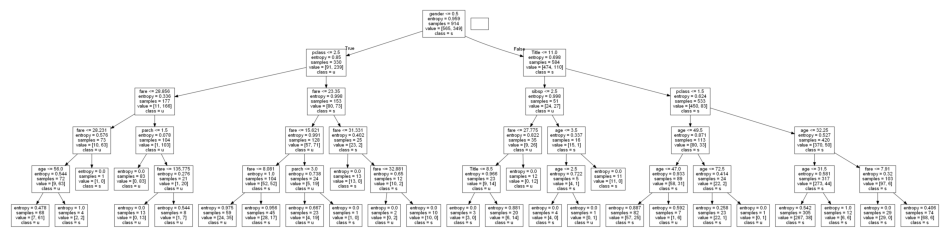

In [109]:
import matplotlib.image as pltimg

img = pltimg.imread('img/titanic.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [104]:
data.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'Embarked',
       'Title'],
      dtype='object')

In [110]:
dtclf.feature_importances_

array([0.19673789, 0.08342679, 0.04049984, 0.01146101, 0.13993263,
       0.45812414, 0.        , 0.0698177 ])